In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

from particle.utils.log import parseLog

fontSongTi = FontProperties(fname="/opt/miniconda3/envs/PyTorch/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/simsun.ttf",
                            size=28)
fontHeiTi = FontProperties(fname="/usr/share/fonts/truetype/wqy/wqy-microhei.ttc", 
                           size=28)
zhfont = fontSongTi
size = 24
labelsize = 20

plt.style.use("bmh")

## 1. VAE

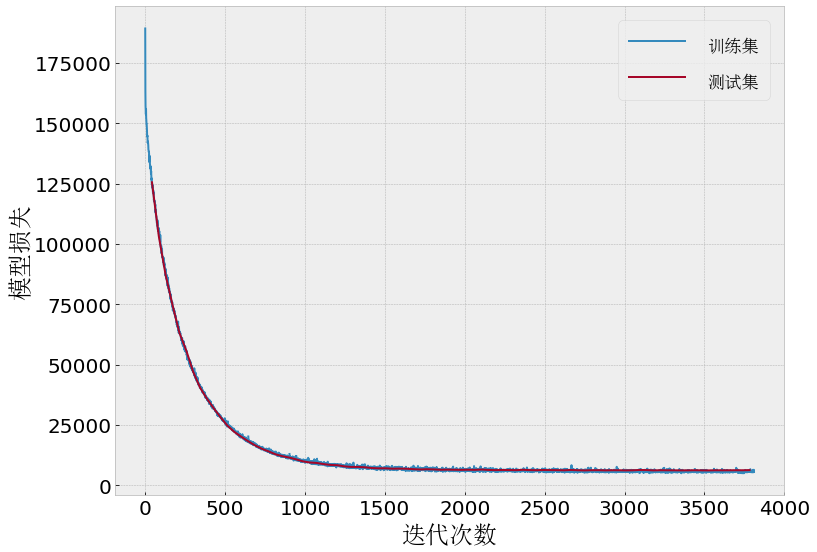

In [2]:
log = "/home/chuan/soil/output/vae/nLatent64/vae.log"
var1 = parseLog(log, "loss")
var2 = parseLog(log, "testLoss")

var1 = np.array(var1)
var2 = np.array(var2)

# 按真实的迭代顺序对齐横坐标
xRange1 = np.arange(len(var1))
xRange2 = np.arange(42, len(var1), 43)

# 剔除异常数据（也不知道是为什么有这个发生）
errorLoc = np.arange(42, len(var1), 43)
var1[errorLoc] = None

slicer1 = slice(None, None, None)
slicer2 = slice(None, None, None)
# slicer1 = slice(len(xRange1)//4, None, None)
# slicer2 = slice(len(xRange2)//4, None, None)

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(xRange1[slicer1], var1[slicer1], label="训练集")
ax.plot(xRange2[slicer2], var2[slicer2], label="测试集")

# 坐标轴刻度的大小
ax.tick_params(labelsize=labelsize)

ax.spines["top"].set_visible(True)
ax.set_xlabel('迭代次数', fontproperties=zhfont, size=size)
ax.set_ylabel('模型损失', fontproperties=zhfont, size=size)

ax.legend(fancybox=True, prop=zhfont)
leg = ax.get_legend()
ltext = leg.get_texts()
# xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
plt.setp(ltext, fontsize='xx-large')

plt.savefig("/home/chuan/VaeLoss.png", dpi=150)

## 2. TVSNet

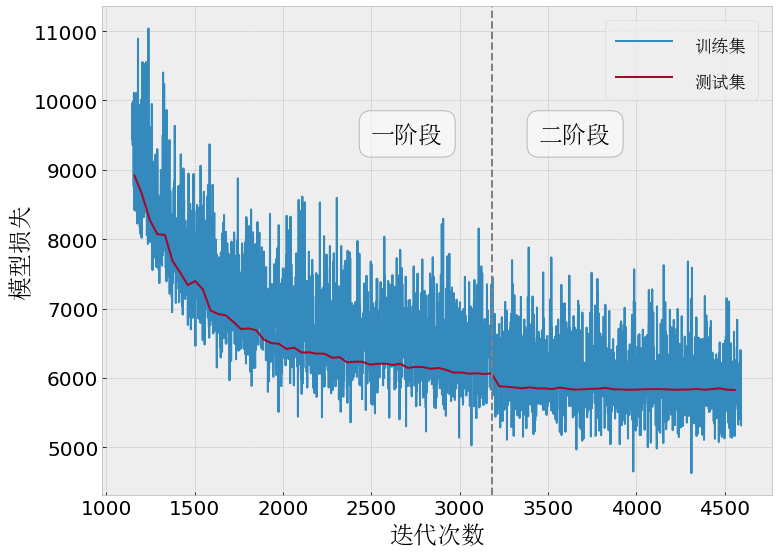

In [3]:
log = "/home/chuan/soil/output/tvsnet/vae/网络加深/dropout0.2, 数据增强/预训练/TVSNet.log"
var1 = parseLog(log, "lossRe")
var2 = parseLog(log, "testLoss")

log = "/home/chuan/soil/output/tvsnet/vae/网络加深/dropout0.2, 数据增强/精调-lr0.0001-rotate60/TVSNet.log"
var1.extend(parseLog(log, "lossRe"))
var2.extend(parseLog(log, "testLoss"))

var1 = np.array(var1)
var2 = np.array(var2)

# 按真实的迭代顺序对齐横坐标
xRange1 = np.arange(len(var1))
# xRange2 = np.arange(21, len(var1), 22)  # bs=128
xRange2 = np.arange(42, len(var1), 43)  # bs=64

# slicer1 = slice(None, None, None)
# slicer2 = slice(None, None, None)
slicer1 = slice(len(xRange1)//4, None, None)
slicer2 = slice(len(xRange2)//4, None, None)

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(xRange1[slicer1], var1[slicer1], label="训练集")
ax.plot(xRange2[slicer2], var2[slicer2], label="测试集")

# 坐标轴刻度的大小
ax.tick_params(labelsize=labelsize)

ax.set_xlabel('迭代次数', fontproperties=zhfont, size=size)
ax.set_ylabel('模型损失', fontproperties=zhfont, size=size)

# 插入一条竖线
lineLoc = 3182
ax.axvline(lineLoc, color='grey', linestyle ="--")

# 插入文字
leftTextLocX = 2500
rightTextLocX = 3450
ax.text(leftTextLocX, 9400, "一阶段", fontproperties=zhfont, size=size, style="italic", weight="heavy",
       bbox=dict(boxstyle='round, pad=0.5', fc="white", ec='grey', lw=1 ,alpha=0.5))
ax.text(rightTextLocX, 9400, "二阶段", fontproperties=zhfont, size=size, style="italic", weight="heavy",
       bbox=dict(boxstyle='round, pad=0.5', fc="white", ec='grey', lw=1 ,alpha=0.5))

ax.legend(fancybox=True, prop=zhfont)
leg = ax.get_legend()
ltext = leg.get_texts()
# xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
plt.setp(ltext, fontsize='xx-large')

plt.savefig("/home/chuan/TVSNetLoss.png", dpi=150)

## TEMP

[None, None, None, None]

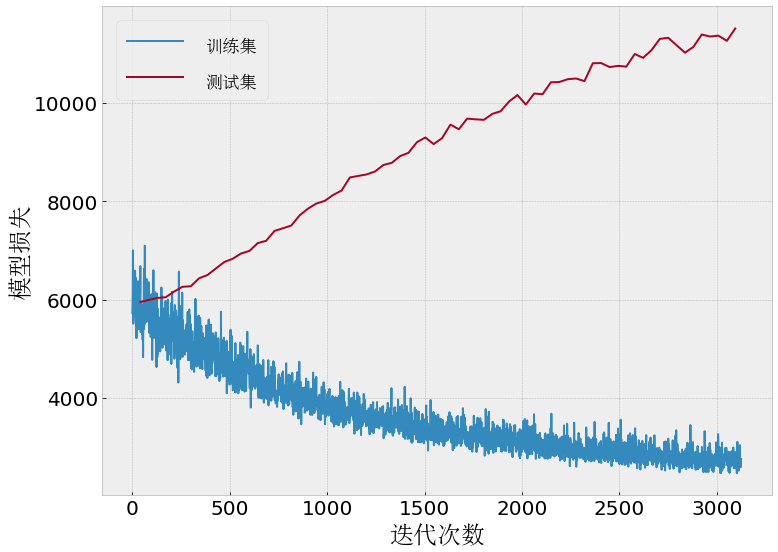

In [7]:
log = "/home/chuan/soil/output/tvsnet/TVSNet.log"
var1 = parseLog(log, "lossRe")
var2 = parseLog(log, "testLoss")

var1 = np.array(var1)
var2 = np.array(var2)

# 按真实的迭代顺序对齐横坐标
xRange1 = np.arange(len(var1))
# xRange2 = np.arange(21, len(var1), 22)  # bs=128
xRange2 = np.arange(42, len(var1), 43)  # bs=64

slicer1 = slice(None, None, None)
slicer2 = slice(None, None, None)
# slicer1 = slice(len(xRange1)//4, None, None)
# slicer2 = slice(len(xRange2)//4, None, None)

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(xRange1[slicer1], var1[slicer1], label="训练集")
ax.plot(xRange2[slicer2], var2[slicer2], label="测试集")

# 坐标轴刻度的大小
ax.tick_params(labelsize=labelsize)

ax.set_xlabel('迭代次数', fontproperties=zhfont, size=size)
ax.set_ylabel('模型损失', fontproperties=zhfont, size=size)

ax.legend(fancybox=True, prop=zhfont)
leg = ax.get_legend()
ltext = leg.get_texts()
# xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
plt.setp(ltext, fontsize='xx-large')